# Regressão Linear Múltipla

1. Análise Exploratória dos Dados
2. Criação do Modelo de Regressão Linear Múltipla  
    2.1. Sklearn  
    2.2. StatsModels  
3. Remoção de Outliers
4. Considerando dados categóricos
3. Retirando Variáveis
4. Transformação de Variáveis
5. Na prática: Divisão Treino/Teste
6. Exercício

In [1]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Carregando dataset
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/6e4f0eea-5f67-4e91-ae19-8343df190003.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.Species.nunique()

7

In [5]:
df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
df.shape

(159, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


## Análise Exploratória dos Dados

> Como os dados se relacionam?

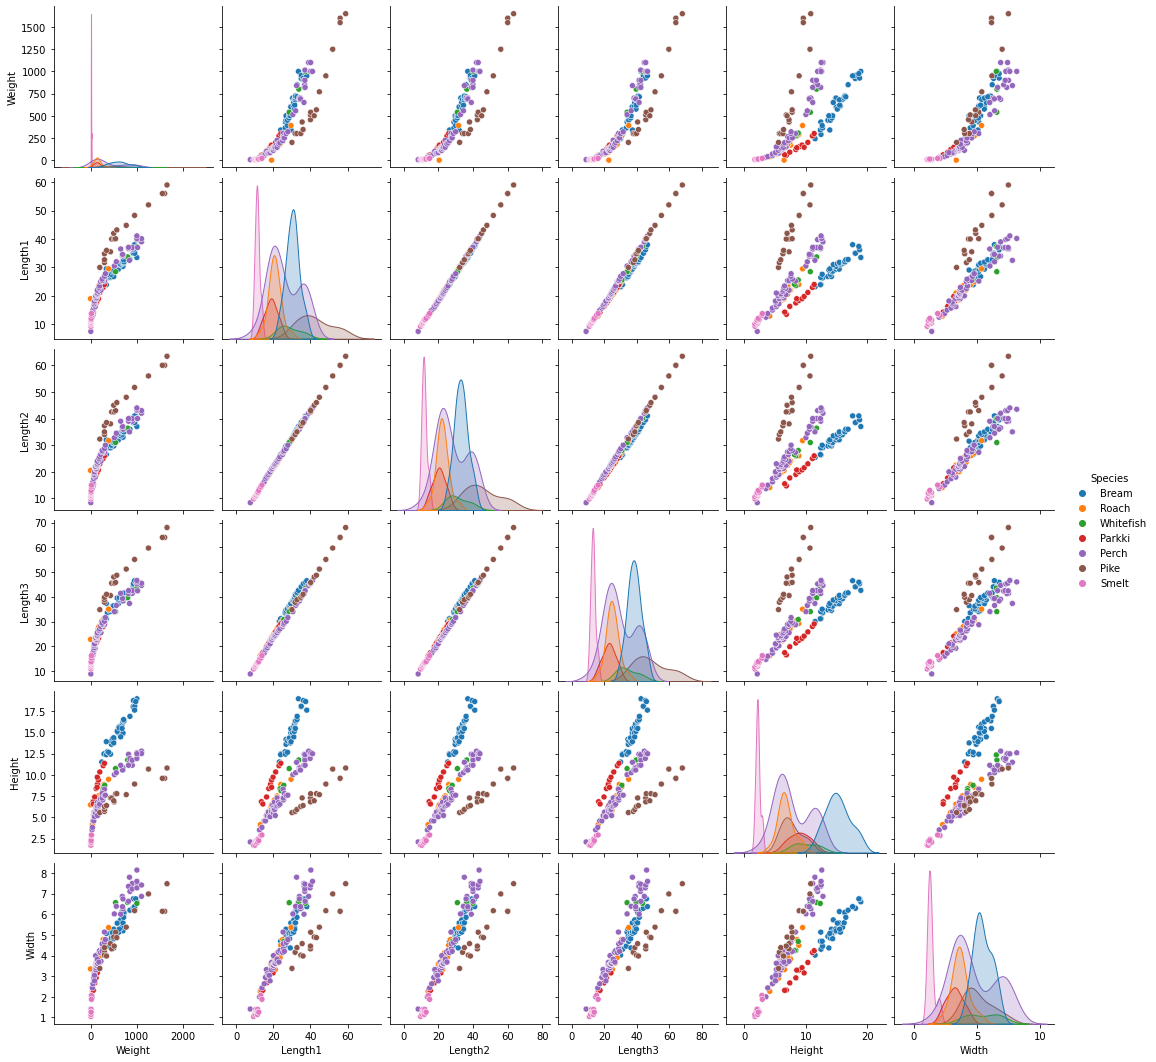

In [73]:
sns.pairplot(df, hue='Species')

In [74]:
# Matriz de correlação
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

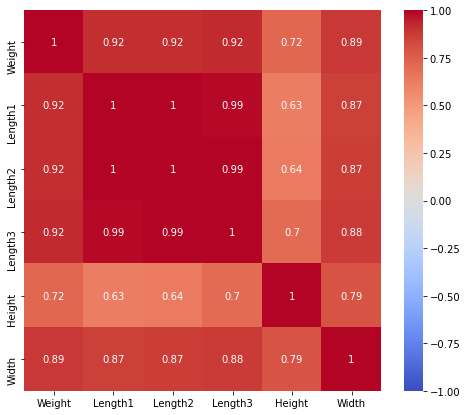

In [11]:
plt.figure(figsize=(8, 7))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

## Definir a Regressão Linear Múltipla

In [12]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [13]:
# X: Length1 Length2 Length3 Height	Width
# y: Weight

In [14]:
df.drop(['Species', 'Weight'], axis=1)

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [15]:
X = df.drop(['Species', 'Weight'], axis=1)
y = df['Weight']

In [16]:
X.head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [17]:
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

---
### Scikit Learning

#### Etapas de utilização de um modelo de ML

1. Preparar o X (variáveis explicativas) e o y (variável resposta)
2. Fitar o modelo (treinar): calcular os coefientes da Regressão Linear.
3. Predizer outros valores de X, utilizando o modelo treinado.

In [19]:
lr_initial = LinearRegression().fit(X, y)

In [20]:
lr_initial.intercept_ # Intercepto ou beta_0

-499.58695535694176

In [21]:
lr_initial.coef_

array([ 62.35521443,  -6.52675249, -29.02621861,  28.29735132,
        22.47330665])

In [22]:
X.columns

Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In [23]:
pd.DataFrame(lr_initial.coef_.T, index=X.columns, columns=['Coeficientes'])

,Coeficientes
Length1,62.355214
Length2,-6.526752
Length3,-29.026219
Height,28.297351
Width,22.473307


#### Regressão Linear Simples

$$
y = \beta_0 + \beta_1 \cdot x
$$

#### Regressão Linear Múltipla

$$
    y_i = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5
$$

In [24]:
lr_initial.coef_

array([ 62.35521443,  -6.52675249, -29.02621861,  28.29735132,
        22.47330665])

In [25]:
lr_initial.intercept_

-499.58695535694176

In [26]:
df.loc[0]

Species    Bream
Weight     242.0
Length1     23.2
Length2     25.4
Length3     30.0
Height     11.52
Width       4.02
Name: 0, dtype: object

#### Predição para todos os dados do Dataset

In [27]:
y_est = lr_initial.predict(X)

In [28]:
y_est[:5]

array([326.81612777, 369.57859339, 370.82418025, 439.05613854,
       444.16916821])

In [29]:
y[:5].values

array([242., 290., 340., 363., 430.])

In [30]:
lr_initial.score(X, y)

0.8852867046546207

In [94]:
r2_score(y, y_est)

0.8852867046546207

### Statsmodels

In [32]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

C:\Users\Fabio\python_financas\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           4.95e-70
Time:                        13:08:37   Log-Likelihood:                -987.96
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     153   BIC:                             2006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -499.5870     29.572    -16.894      0.000    -558.010    -441.164
Length1       62.3552     40.209      1.551      0.123     -17.081     141.791
Length2       -6.5268     41.759     -0.156      0.876     -89.025      75.971
Length3      -29.0262     17.353     -1.673      0.096     -63.309       5.256
Height        28.2974      8.729      3.242      0.001      11.052      45.543
Width         22.4733     20.372      1.103      0.272     -17.773      62.720
==============================================================================
Omnibus:                       20.989   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.307
Skew:                           0.792   Prob(JB):                     1.18e-06
Kurtosis:                       4.269   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Análise do Erro da Regressão

In [33]:
model.resid

0      -84.816128
1      -79.578593
2      -30.824180
3      -76.056139
4      -14.169168
          ...    
154    172.808116
155    158.935439
156    150.043413
157    102.979758
158    101.905694
Length: 159, dtype: float64

#### 1. A média do erro deve ser zero

In [97]:
model.resid.mean()

5.369736800561864e-13

#### 2. A distribuição dos erros deve seguir uma distribuição normal

<AxesSubplot:ylabel='Count'>

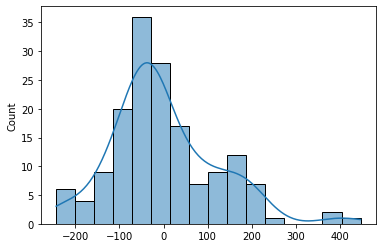

In [98]:
sns.histplot(model.resid, kde=True)

#### 3. Erro deve ser descorrelacionado

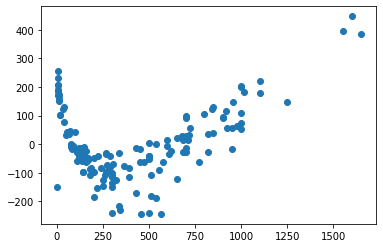

In [99]:
plt.scatter(y, model.resid)

## Removendo Outliers

<AxesSubplot:>

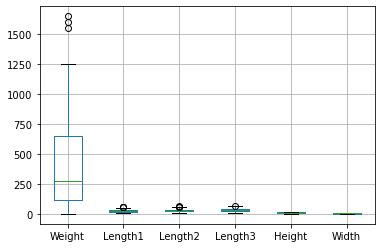

In [34]:
df.boxplot()

In [38]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


<AxesSubplot:>

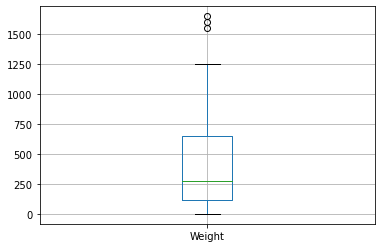

In [42]:
df[['Weight']].boxplot()

<AxesSubplot:>

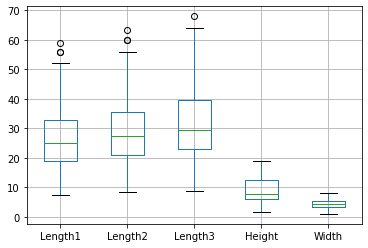

In [43]:
df.drop('Weight', axis=1).boxplot()

In [44]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [46]:
# Exemplo
calc_min_and_max_range(df["Weight"])

(-675.0, 1445.0)

In [105]:
columns_to_remove_outliers = ['Weight', 'Length1', 'Length2', 'Length3']

for coluna in columns_to_remove_outliers:
    inf, sup = calc_min_and_max_range(df[coluna])
    
    # Filtro para pegar apenas as linhas cujos dados estão dentro do intervalo aceitável (não outliers)
    df = df[(df[coluna] > inf) & (df[coluna] < sup)]

In [106]:
df.shape

(155, 7)

## Modelo de Regressão sem Outliers
---

In [107]:
df.shape

(155, 7)

In [108]:
X = df.drop(['Species', 'Weight'], axis=1)
y = df['Weight']

### Sklearn

In [109]:
lr = LinearRegression().fit(X, y)

In [110]:
lr.intercept_

-407.80289551521486

In [111]:
lr.coef_

array([117.12775535, -58.91441635, -38.83235179,  39.44185078,
        56.39736764])

In [112]:
lr.score(X, y)

0.9069290835432218

### Statsmodels

In [113]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     290.4
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           6.45e-75
Time:                        19:29:33   Log-Likelihood:                -925.92
No. Observations:                 155   AIC:                             1864.
Df Residuals:                     149   BIC:                             1882.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -407.8029     25.200    -16.183      0.000    -457.598    -358.008
Length1      117.1278     32.241      3.633      0.000      53.419     180.837
Length2      -58.9144     33.359     -1.766      0.079    -124.832       7.003
Length3      -38.8324     13.769     -2.820      0.005     -66.041     -11.624
Height        39.4419      7.022      5.617      0.000      25.566      53.318
Width         56.3974     16.515      3.415      0.001      23.763      89.032
==============================================================================
Omnibus:                        9.828   Durbin-Watson:                   0.544
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.392
Skew:                           0.609   Prob(JB):                      0.00554
Kurtosis:                       2.646   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:ylabel='Count'>

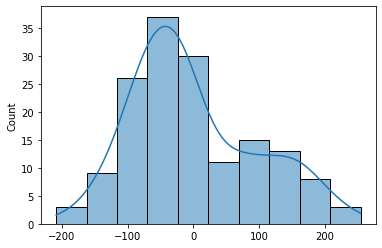

In [115]:
sns.histplot(model.resid, kde=True)

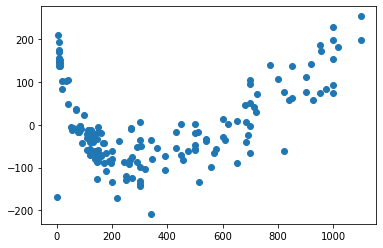

In [116]:
plt.scatter(y, model.resid)

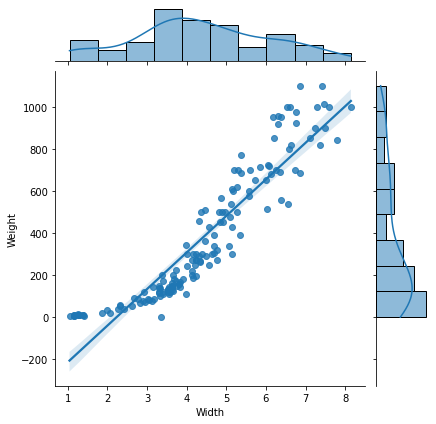

In [118]:
sns.jointplot(data=df, x='Width', y='Weight', kind='reg')

<AxesSubplot:xlabel='Length1', ylabel='Weight'>

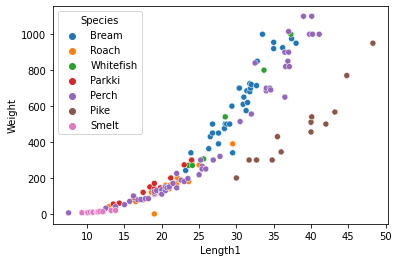

In [125]:
sns.scatterplot(data=df, x='Length1', y='Weight', hue='Species')

## Considerando os Dados Categóricos
---

In [119]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [120]:
df.describe(include=['object'])

,Species
count,155
unique,7
top,Perch
freq,56


In [121]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Smelt        14
Pike         13
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [134]:
pd.get_dummies(df, drop_first=True, columns=['Species'])

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,1,0


In [133]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [131]:
df_dummies

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,1,0


## Avaliando o modelo com a presença dos Dados Categóricos

### Sklearn

In [135]:
df_dummies.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [138]:
X = df_dummies.drop('Weight', axis=1)
y = df_dummies.Weight

In [139]:
X.head()

,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [140]:
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

### LinearRegression

In [141]:
lr = LinearRegression().fit(X, y)

In [142]:
lr.coef_

array([ 11.09745916,  22.29892593, -19.73880783,  50.05293859,
        50.71876482,  66.18084011, 159.10714358, 155.81949124,
       133.4484189 , 434.12571174, 145.91154502])

In [143]:
lr.intercept_

-734.9518038546607

In [144]:
lr.score(X, y)

0.9472987222606406

### Statsmodels

In [145]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     233.7
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           1.60e-85
Time:                        19:55:42   Log-Likelihood:                -881.85
No. Observations:                 155   AIC:                             1788.
Df Residuals:                     143   BIC:                             1824.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -734.9518    102.906     -7.142      0.000    -938.366    -531.537
Length1              11.0975     30.730      0.361      0.719     -49.647      71.842
Length2              22.2989     37.115      0.601      0.549     -51.065      95.663
Length3             -19.7388     24.100     -0.819      0.414     -67.377      27.899
Height               50.0529     11.479      4.360      0.000      27.362      72.744
Width                50.7188     19.915      2.547      0.012      11.352      90.085
Species_Parkki       66.1808     61.153      1.082      0.281     -54.699     187.061
Species_Perch       159.1071     95.642      1.664      0.098     -29.948     348.163
Species_Pike        155.8195    114.178      1.365      0.174     -69.875     381.514
Species_Roach       133.4484     72.566      1.839      0.068      -9.993     276.890
Species_Smelt       434.1257     94.892      4.575      0.000     246.553     621.698
Species_Whitefish   145.9115     77.013      1.895      0.060      -6.319     298.142
==============================================================================
Omnibus:                       31.844   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.782
Skew:                           1.005   Prob(JB):                     2.10e-12
Kurtosis:                       5.070   Cond. No.                     1.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
model.resid

0     -35.237020
1     -55.033551
2     -25.047739
3     -42.481527
4      12.070844
         ...    
154     2.546107
155   -11.637709
156   -16.406819
157   -93.443043
158   -89.209976
Length: 155, dtype: float64

<AxesSubplot:ylabel='Count'>

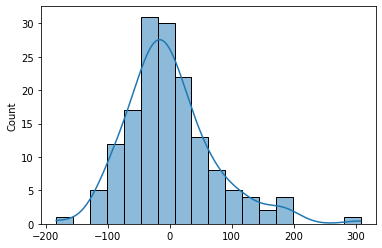

In [148]:
sns.histplot(model.resid, kde=True)

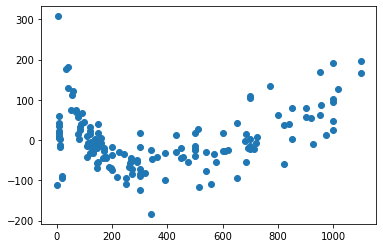

In [149]:
plt.scatter(y, model.resid)

### Remoção de Variáveis Desnecessárias
---

<AxesSubplot:>

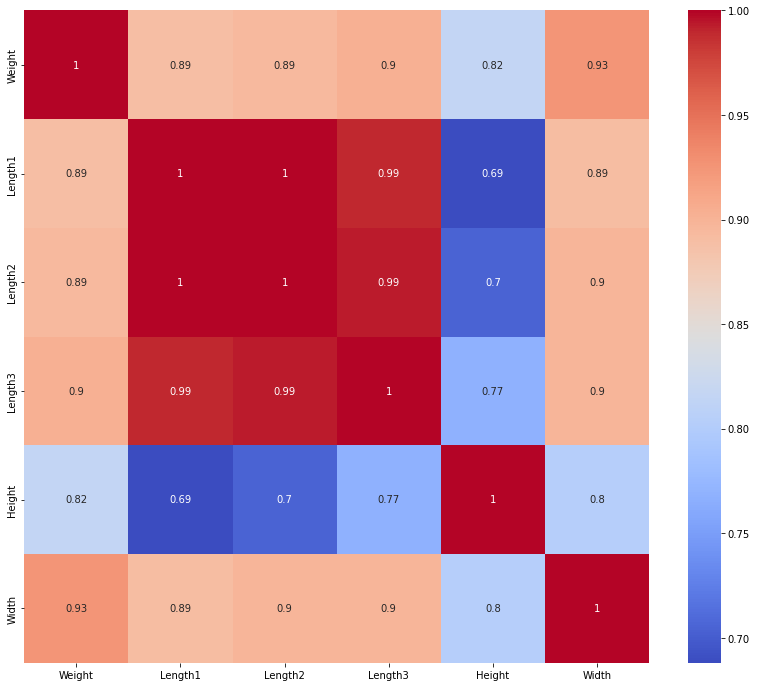

In [150]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [151]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.890173,0.894415,0.902576,0.815237,0.925664
Length1,0.890173,1.000000,0.999385,0.990205,0.688050,0.891260
Length2,0.894415,0.999385,1.000000,0.992765,0.704041,0.897855
Length3,0.902576,0.990205,0.992765,1.000000,0.768038,0.898315
Height,0.815237,0.688050,0.704041,0.768038,1.000000,0.803268
Width,0.925664,0.891260,0.897855,0.898315,0.803268,1.000000


In [153]:
df_dummies.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [155]:
X = df_dummies.drop(['Weight', 'Length2', 'Length3'], axis=1)
y = df_dummies.Weight

### Sklearn

In [156]:
lr = LinearRegression().fit(X, y)

In [157]:
lr.intercept_

-795.129813781376

In [158]:
lr.coef_

array([ 13.61604678,  48.740041  ,  47.95551059, 103.67544462,
       216.17898135, 187.49091882, 164.35788087, 481.08091028,
       182.80024493])

In [159]:
lr.score(X, y)

0.9470435482199099

### Statsmodels

In [161]:
x = sm.add_constant(X)
model = sm.OLS(y, x).fit()

model.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     288.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           7.84e-88
Time:                        20:08:29   Log-Likelihood:                -882.22
No. Observations:                 155   AIC:                             1784.
Df Residuals:                     145   BIC:                             1815.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -795.1298     66.465    -11.963      0.000    -926.496    -663.764
Length1              13.6160      3.868      3.520      0.001       5.971      21.261
Height               48.7400     10.737      4.540      0.000      27.519      69.961
Width                47.9555     19.473      2.463      0.015       9.467      86.444
Species_Parkki      103.6754     37.725      2.748      0.007      29.113     178.238
Species_Perch       216.1790     66.159      3.268      0.001      85.418     346.940
Species_Pike        187.4909    106.233      1.765      0.080     -22.475     397.457
Species_Roach       164.3579     61.481      2.673      0.008      42.844     285.872
Species_Smelt       481.0809     73.236      6.569      0.000     336.332     625.830
Species_Whitefish   182.8002     62.681      2.916      0.004      58.914     306.687
==============================================================================
Omnibus:                       33.050   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.726
Skew:                           1.034   Prob(JB):                     4.81e-13
Kurtosis:                       5.123   Cond. No.                         840.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

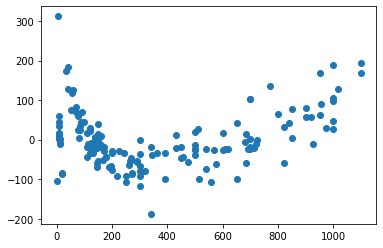

In [162]:
plt.scatter(y, model.resid)

## Transformação de Variáveis
---

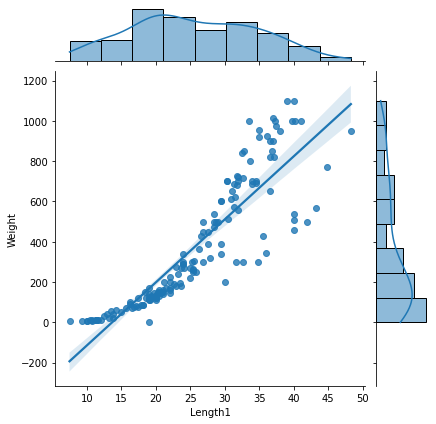

In [163]:
sns.jointplot(data=df, x='Length1', y='Weight', kind='reg')

### Transformação log & Transformação log-log (duplo)

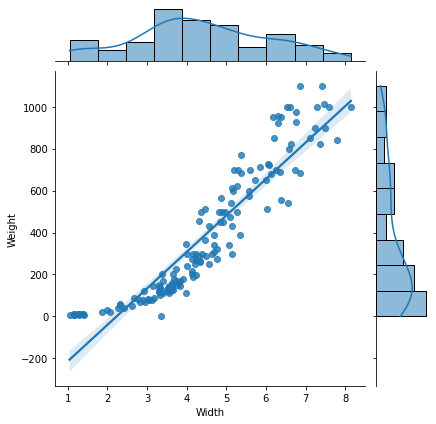

In [168]:
sns.jointplot(x=df['Width'], y=df['Weight'], kind='reg')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


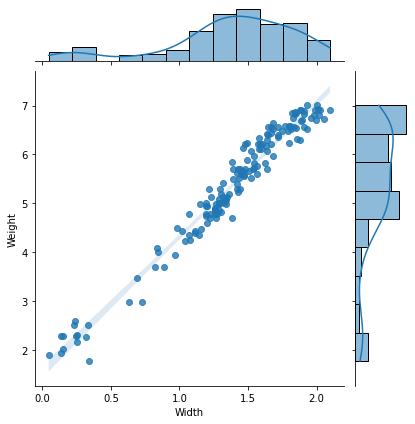

In [167]:
sns.jointplot(x=np.log(df['Width']), y=np.log(df['Weight']), kind='reg')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


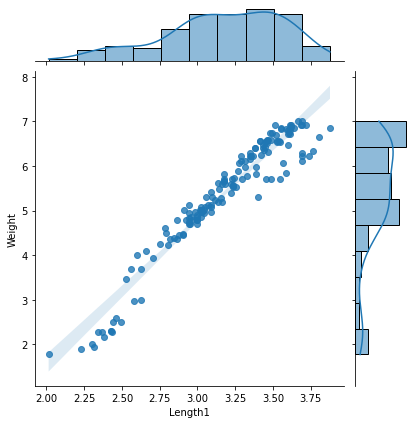

In [169]:
sns.jointplot(x=np.log(df['Length1']), y=np.log(df['Weight']), kind='reg')

In [170]:
df.Weight.all()

False

In [171]:
df.Width.all()

True

In [172]:
df.query('Weight == 0')

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [174]:
df_dummies.drop(40, inplace=True)

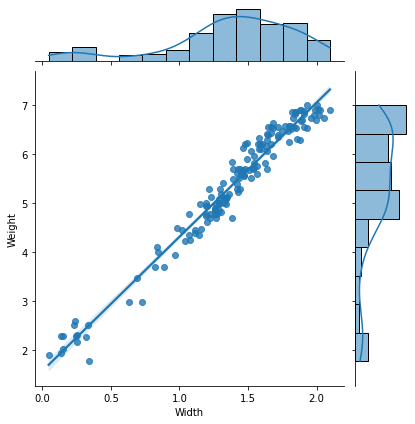

In [177]:
sns.jointplot(x=np.log(df_dummies['Width']), y=np.log(df_dummies['Weight']), kind='reg')

In [183]:
df_log = df_dummies.copy()

In [182]:
df_log.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [184]:
df_log['Weight'] = np.log(df_log['Weight'])
df_log['Height'] = np.log(df_log['Height'])
df_log['Length1'] = np.log(df_log['Length1'])
df_log['Width'] = np.log(df_log['Width'])

In [186]:
df_log.drop(['Length2', 'Length3'], axis=1, inplace=True)

In [187]:
df_log.head()

,Weight,Length1,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,5.488938,3.144152,2.444085,1.391282,0,0,0,0,0,0
1,5.669881,3.178054,2.524127,1.459917,0,0,0,0,0,0
2,5.828946,3.173878,2.515905,1.546732,0,0,0,0,0,0
3,5.894403,3.269569,2.543961,1.494139,0,0,0,0,0,0
4,6.063785,3.277145,2.521239,1.635885,0,0,0,0,0,0


### Separando as variáveis explicativas e a variável resposta

In [188]:
X = df_log.drop('Weight', axis=1)
y = df_log.Weight

### Sklearn

In [189]:
lr = LinearRegression().fit(X, y)

In [190]:
lr.coef_

array([ 1.51135904,  0.79460305,  0.63030782,  0.0480126 ,  0.11479889,
        0.08675662,  0.07732207, -0.09071763,  0.19398851])

In [191]:
lr.intercept_

-1.9953926318689366

In [192]:
lr.score(X, y)

0.9959289106154291

### Statsmodels

In [193]:
x = sm.add_constant(X)
model = sm.OLS(y, x).fit()

model.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3914.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.37e-167
Time:                        20:49:39   Log-Likelihood:                 164.61
No. Observations:                 154   AIC:                            -309.2
Df Residuals:                     144   BIC:                            -278.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.9954      0.214     -9.324      0.000      -2.418      -1.572
Length1               1.5114      0.143     10.541      0.000       1.228       1.795
Height                0.7946      0.145      5.467      0.000       0.507       1.082
Width                 0.6303      0.110      5.719      0.000       0.412       0.848
Species_Parkki        0.0480      0.033      1.458      0.147      -0.017       0.113
Species_Perch         0.1148      0.076      1.515      0.132      -0.035       0.265
Species_Pike          0.0868      0.136      0.638      0.525      -0.182       0.356
Species_Roach         0.0773      0.067      1.158      0.249      -0.055       0.209
Species_Smelt        -0.0907      0.120     -0.756      0.451      -0.328       0.146
Species_Whitefish     0.1940      0.067      2.882      0.005       0.061       0.327
==============================================================================
Omnibus:                       23.109   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.634
Skew:                          -0.531   Prob(JB):                     5.59e-15
Kurtosis:                       6.017   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:ylabel='Count'>

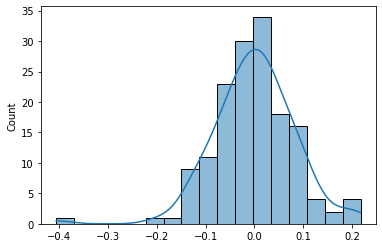

In [194]:
sns.histplot(model.resid, kde=True)

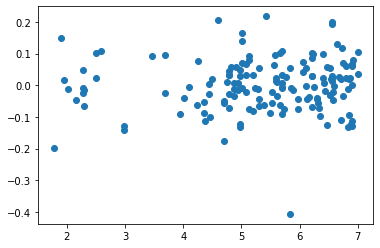

In [195]:
plt.scatter(y, model.resid)

### Removendo as espécies

In [198]:
df_minimal = df_log.drop('Species_Pike', axis=1)

In [199]:
df_minimal.head()

,Weight,Length1,Height,Width,Species_Parkki,Species_Perch,Species_Roach,Species_Smelt,Species_Whitefish
0,5.488938,3.144152,2.444085,1.391282,0,0,0,0,0
1,5.669881,3.178054,2.524127,1.459917,0,0,0,0,0
2,5.828946,3.173878,2.515905,1.546732,0,0,0,0,0
3,5.894403,3.269569,2.543961,1.494139,0,0,0,0,0
4,6.063785,3.277145,2.521239,1.635885,0,0,0,0,0


In [203]:
X = df_minimal.drop('Weight', axis=1)
y = df_minimal.Weight

In [201]:
X.head()

,Length1,Height,Width,Species_Parkki,Species_Perch,Species_Roach,Species_Smelt,Species_Whitefish
0,3.144152,2.444085,1.391282,0,0,0,0,0
1,3.178054,2.524127,1.459917,0,0,0,0,0
2,3.173878,2.515905,1.546732,0,0,0,0,0
3,3.269569,2.543961,1.494139,0,0,0,0,0
4,3.277145,2.521239,1.635885,0,0,0,0,0


### Sklearn

### Statsmodels

In [204]:
x = sm.add_constant(X)
model = sm.OLS(y, x).fit()

model.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     4421.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          4.22e-169
Time:                        20:58:03   Log-Likelihood:                 164.39
No. Observations:                 154   AIC:                            -310.8
Df Residuals:                     145   BIC:                            -283.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.0479      0.197    -10.388      0.000      -2.438      -1.658
Length1               1.5887      0.076     20.779      0.000       1.438       1.740
Height                0.7082      0.053     13.461      0.000       0.604       0.812
Width                 0.6449      0.108      5.995      0.000       0.432       0.858
Species_Parkki        0.0464      0.033      1.417      0.159      -0.018       0.111
Species_Perch         0.0711      0.032      2.195      0.030       0.007       0.135
Species_Roach         0.0407      0.034      1.200      0.232      -0.026       0.108
Species_Smelt        -0.1614      0.046     -3.532      0.001      -0.252      -0.071
Species_Whitefish     0.1613      0.044      3.706      0.000       0.075       0.247
==============================================================================
Omnibus:                       24.804   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.968
Skew:                          -0.557   Prob(JB):                     5.26e-17
Kurtosis:                       6.231   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
model.pvalues[model.pvalues > 0.05]

Species_Parkki    0.158507
Species_Roach     0.232083
dtype: float64

In [210]:
df_minimal.head()

,Weight,Length1,Height,Width,Species_Parkki,Species_Perch,Species_Roach,Species_Smelt,Species_Whitefish
0,5.488938,3.144152,2.444085,1.391282,0,0,0,0,0
1,5.669881,3.178054,2.524127,1.459917,0,0,0,0,0
2,5.828946,3.173878,2.515905,1.546732,0,0,0,0,0
3,5.894403,3.269569,2.543961,1.494139,0,0,0,0,0
4,6.063785,3.277145,2.521239,1.635885,0,0,0,0,0


In [211]:
X = df_minimal.drop(['Weight', 'Species_Parkki', 'Species_Roach'], axis=1)
y = df_minimal.Weight

In [212]:
x = sm.add_constant(X)
model = sm.OLS(y, x).fit()

model.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     5867.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.74e-172
Time:                        21:04:02   Log-Likelihood:                 162.97
No. Observations:                 154   AIC:                            -311.9
Df Residuals:                     147   BIC:                            -290.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8686      0.139    -13.490      0.000      -2.142      -1.595
Length1               1.5314      0.061     25.075      0.000       1.411       1.652
Height                0.6846      0.040     17.272      0.000       0.606       0.763
Width                 0.6986      0.084      8.287      0.000       0.532       0.865
Species_Perch         0.0419      0.022      1.921      0.057      -0.001       0.085
Species_Smelt        -0.1986      0.039     -5.067      0.000      -0.276      -0.121
Species_Whitefish     0.1377      0.039      3.533      0.001       0.061       0.215
==============================================================================
Omnibus:                       29.877   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.892
Skew:                          -0.697   Prob(JB):                     1.11e-20
Kurtosis:                       6.518   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sklearn

In [213]:
lr = LinearRegression().fit(X, y)

In [214]:
y_pred = lr.predict(X)

In [215]:
y_pred[:5]

array([5.59138418, 5.74604511, 5.7946757 , 5.92367539, 6.01875178])

In [219]:
df.Weight[:5]

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [222]:
np.exp(y_pred[:5])

array([268.10647034, 312.95052433, 328.5456181 , 373.78298943,
       411.06517726])

In [233]:
X = df.drop(['Weight', 'Species'], axis=1)

In [234]:
y_pred_initial = lr_initial.predict(X)

y_pred_initial[:5]

array([326.81612777, 369.57859339, 370.82418025, 439.05613854,
       444.16916821])

## Na prática
---

1. Processo de treinamento do nosso modelo
2. Processo de teste do nosso modelo (validação)

#### Divisão treino-teste

- 70% dos dados para treino
- 30% dos dados para teste

In [235]:
X_final = df_minimal.drop(['Weight', 'Species_Parkki', 'Species_Roach'], axis=1)
y_final = df_minimal.Weight

In [236]:
from sklearn.model_selection import train_test_split

---

In [238]:
a, b = 10, 20

In [239]:
a,b

(10, 20)

In [240]:
a, b = [1, 2]

print(a, b)

1 2


In [241]:
a, b = {5, 6}

print(a, b)

5 6


---

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=101)

In [244]:
X_train.shape

(107, 6)

In [245]:
X_final.shape

(154, 6)

In [247]:
X_test.shape

(47, 6)

In [248]:
lr = LinearRegression().fit(X_train, y_train)

In [251]:
y_pred = np.exp(lr.predict(X_test))

In [254]:
r2_score(np.exp(y_test), y_pred)

0.9803560883583547

In [255]:
lr.score(X_train, y_train)

0.996384516643054